In [132]:
import os
import numpy as np
import pandas as pd
from tensorflow import keras
import shap
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
load_path = r"C:\Users\Noaja\Downloads\msci_project\tth-ML-project\data\processed"
interim_path = r"C:\Users\Noaja\Downloads\msci_project\tth-ML-project\data\interim"
model_path =  r"C:\Users\Noaja\Downloads\msci_project\tth-ML-project\models"

event_X_train = pd.read_pickle(os.path.join(load_path, "event_X_train.pkl"))
event_X_test = pd.read_pickle(os.path.join(load_path, "event_X_test.pkl"))

y_train = pd.read_pickle(os.path.join(load_path, "y_train.pkl"))
y_test = pd.read_pickle(os.path.join(load_path, "y_test.pkl"))

object_X_train = np.load(os.path.join(load_path, "object_X_train.npy"))
object_X_test = np.load(os.path.join(load_path, "object_X_test.npy"))

X_test = pd.read_pickle(os.path.join(interim_path, "X_test.pkl"))

model_name = "model_1234_v1.h5"
model_path = os.path.join(model_path, model_name)
model = keras.models.load_model(model_path, custom_objects={"f1_score": f1_score})

# Explain Model Results using SHAP

In [3]:
# Generate the explainer and SHAP values
n_bg = 10
n_values = 1000

background = [event_X_train.head(n_bg).values, object_X_train[:n_bg]]
explainer = shap.GradientExplainer(model, background)
shap_values = explainer.shap_values([event_X_test.head(n_values).values, object_X_test[:n_values]])

`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


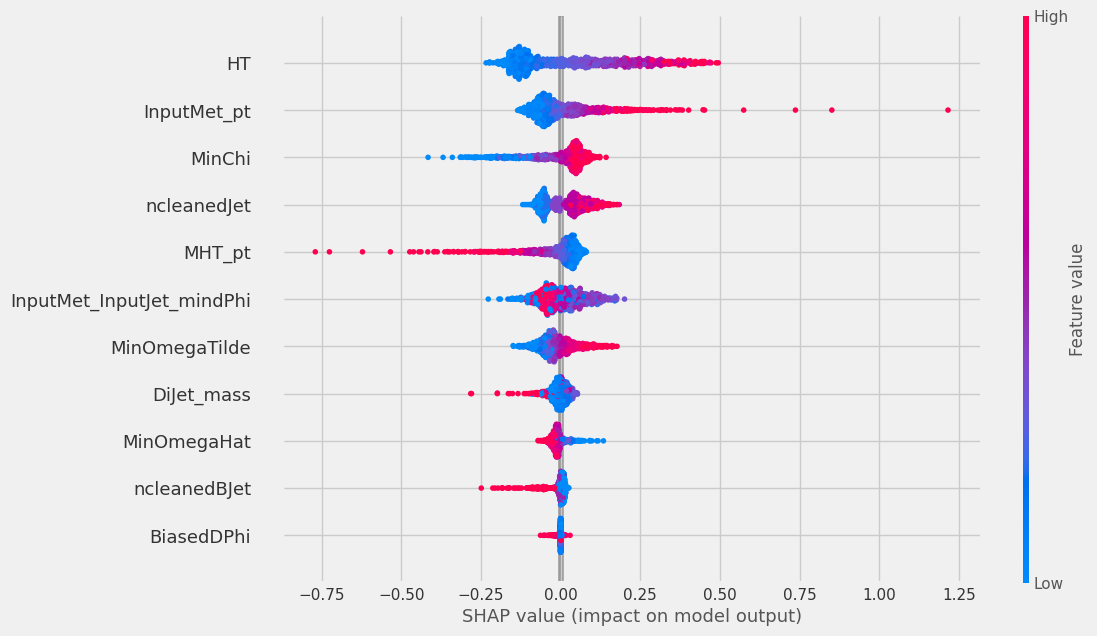

In [99]:
shap.summary_plot(shap_values[0][0], 
                  features=event_X_test.head(n_values), 
                  feature_names=event_X_test.columns, 
                  plot_size=(10, 7))

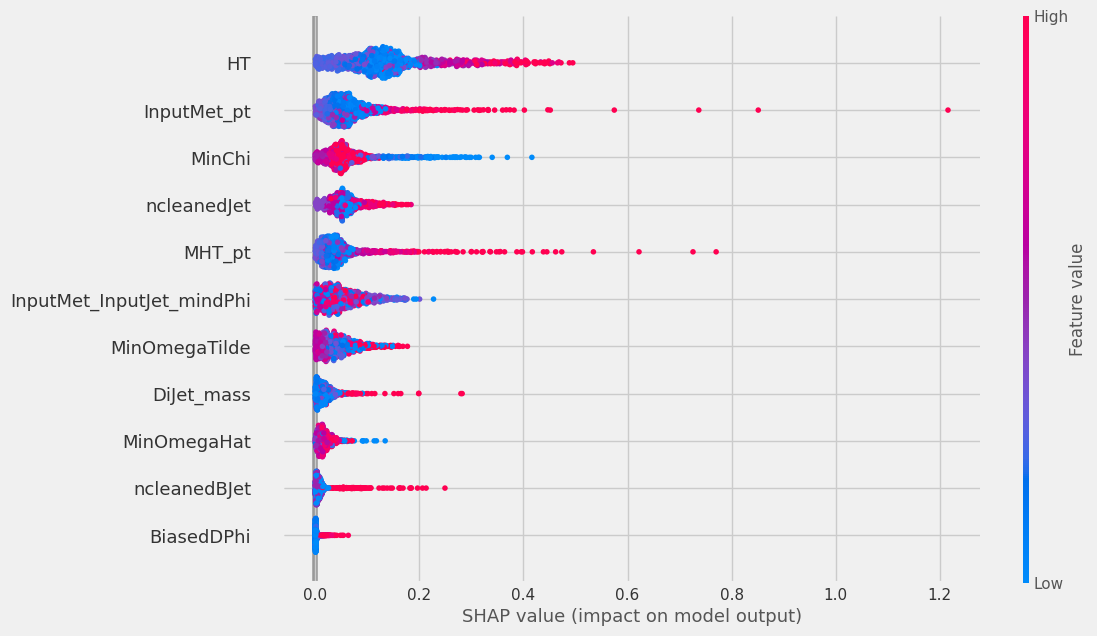

In [100]:
shap.summary_plot(np.abs(shap_values[0][0]), 
                  features=event_X_test.head(n_values), 
                  feature_names=event_X_test.columns, 
                  plot_size=(10, 7))

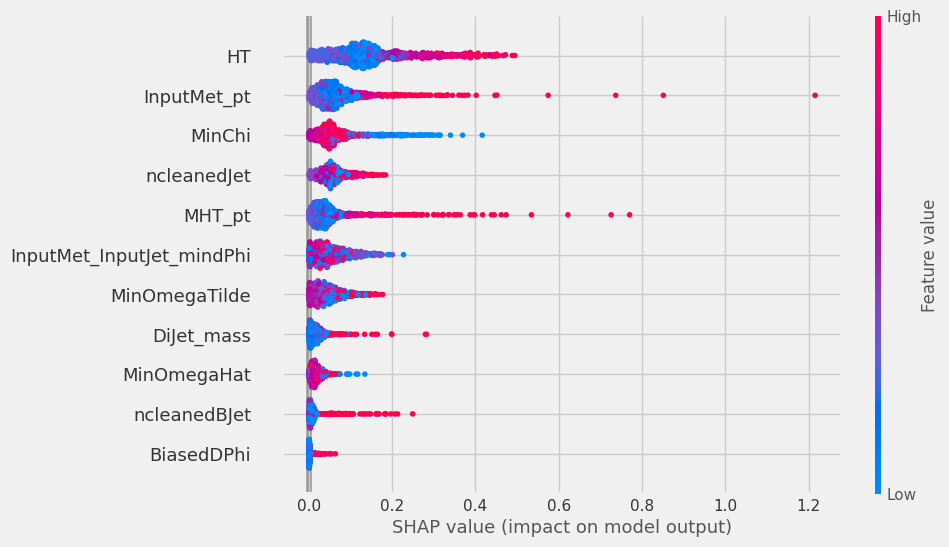

In [159]:
shap.summary_plot(np.abs(shap_values[0][0]), 
                features=event_X_test.head(n_values), 
                feature_names=event_X_test.columns)

Text(0.5, 0, 'max(|SHAP value|)')

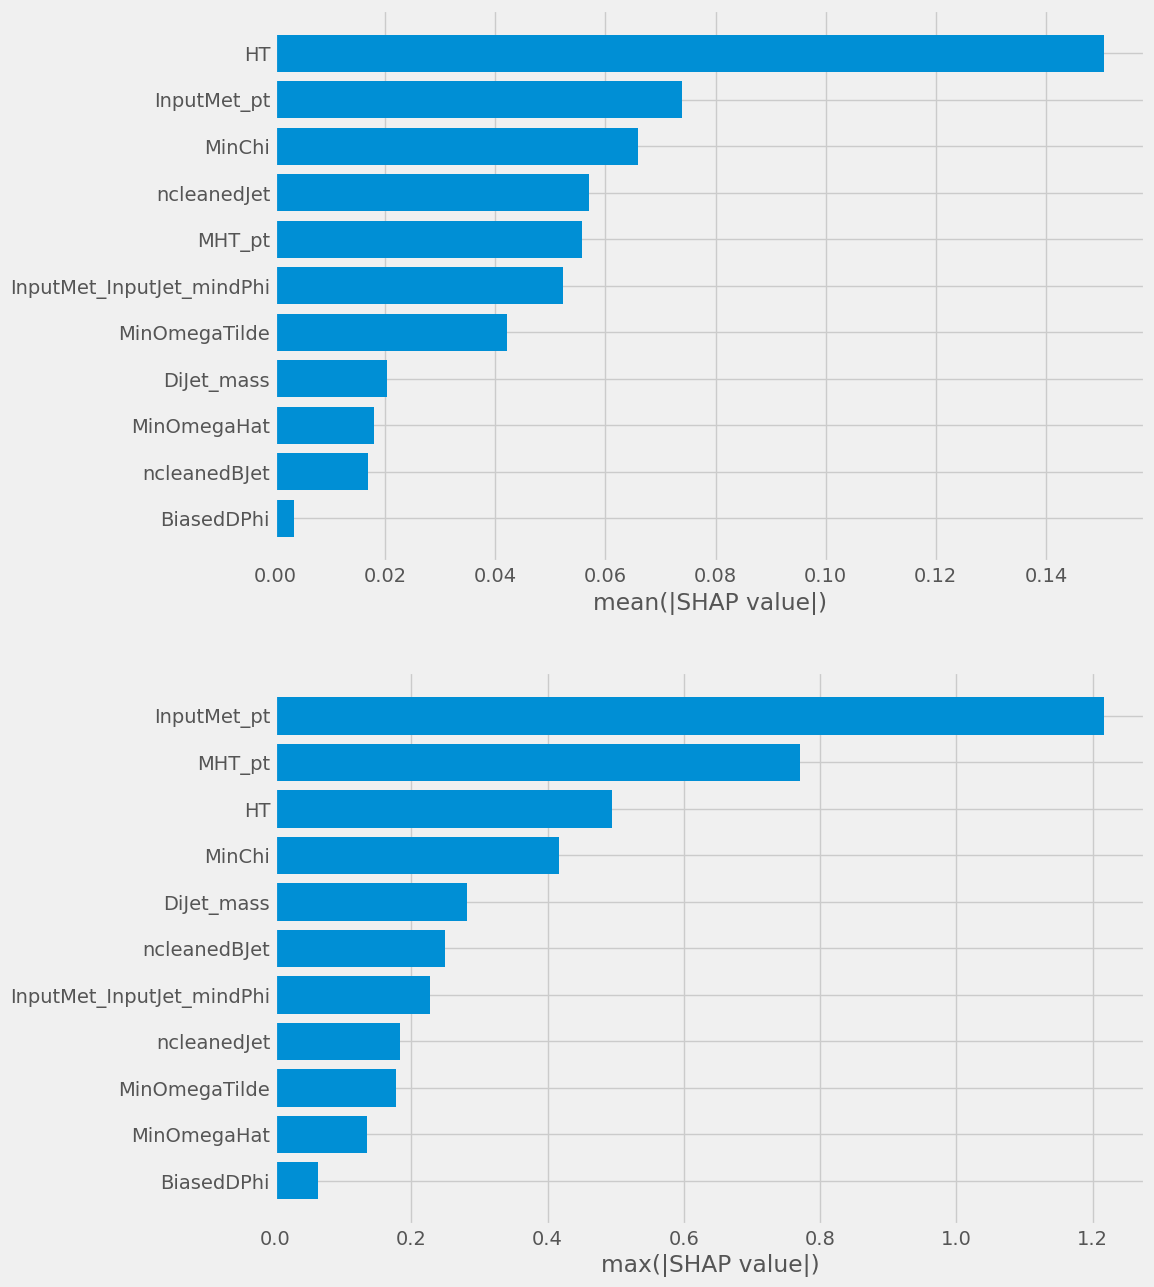

In [172]:
    # max SHAP value bar plot
    fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(10, 15))
    cols = event_X_test.columns

    shap_max = np.max(np.abs(shap_values[0][0]), axis=0)
    shap_mean = np.mean(np.abs(shap_values[0][0]), axis=0)
    shap_max, cols_max = zip(*sorted(zip(shap_max, cols)))
    shap_mean, cols_mean = zip(*sorted(zip(shap_mean, cols)))
    
    axs[0].barh(cols_mean, shap_mean)
    axs[1].barh(cols_max, shap_max)

    axs[0].set_xlabel('mean(|SHAP value|)')
    axs[1].set_xlabel('max(|SHAP value|)')

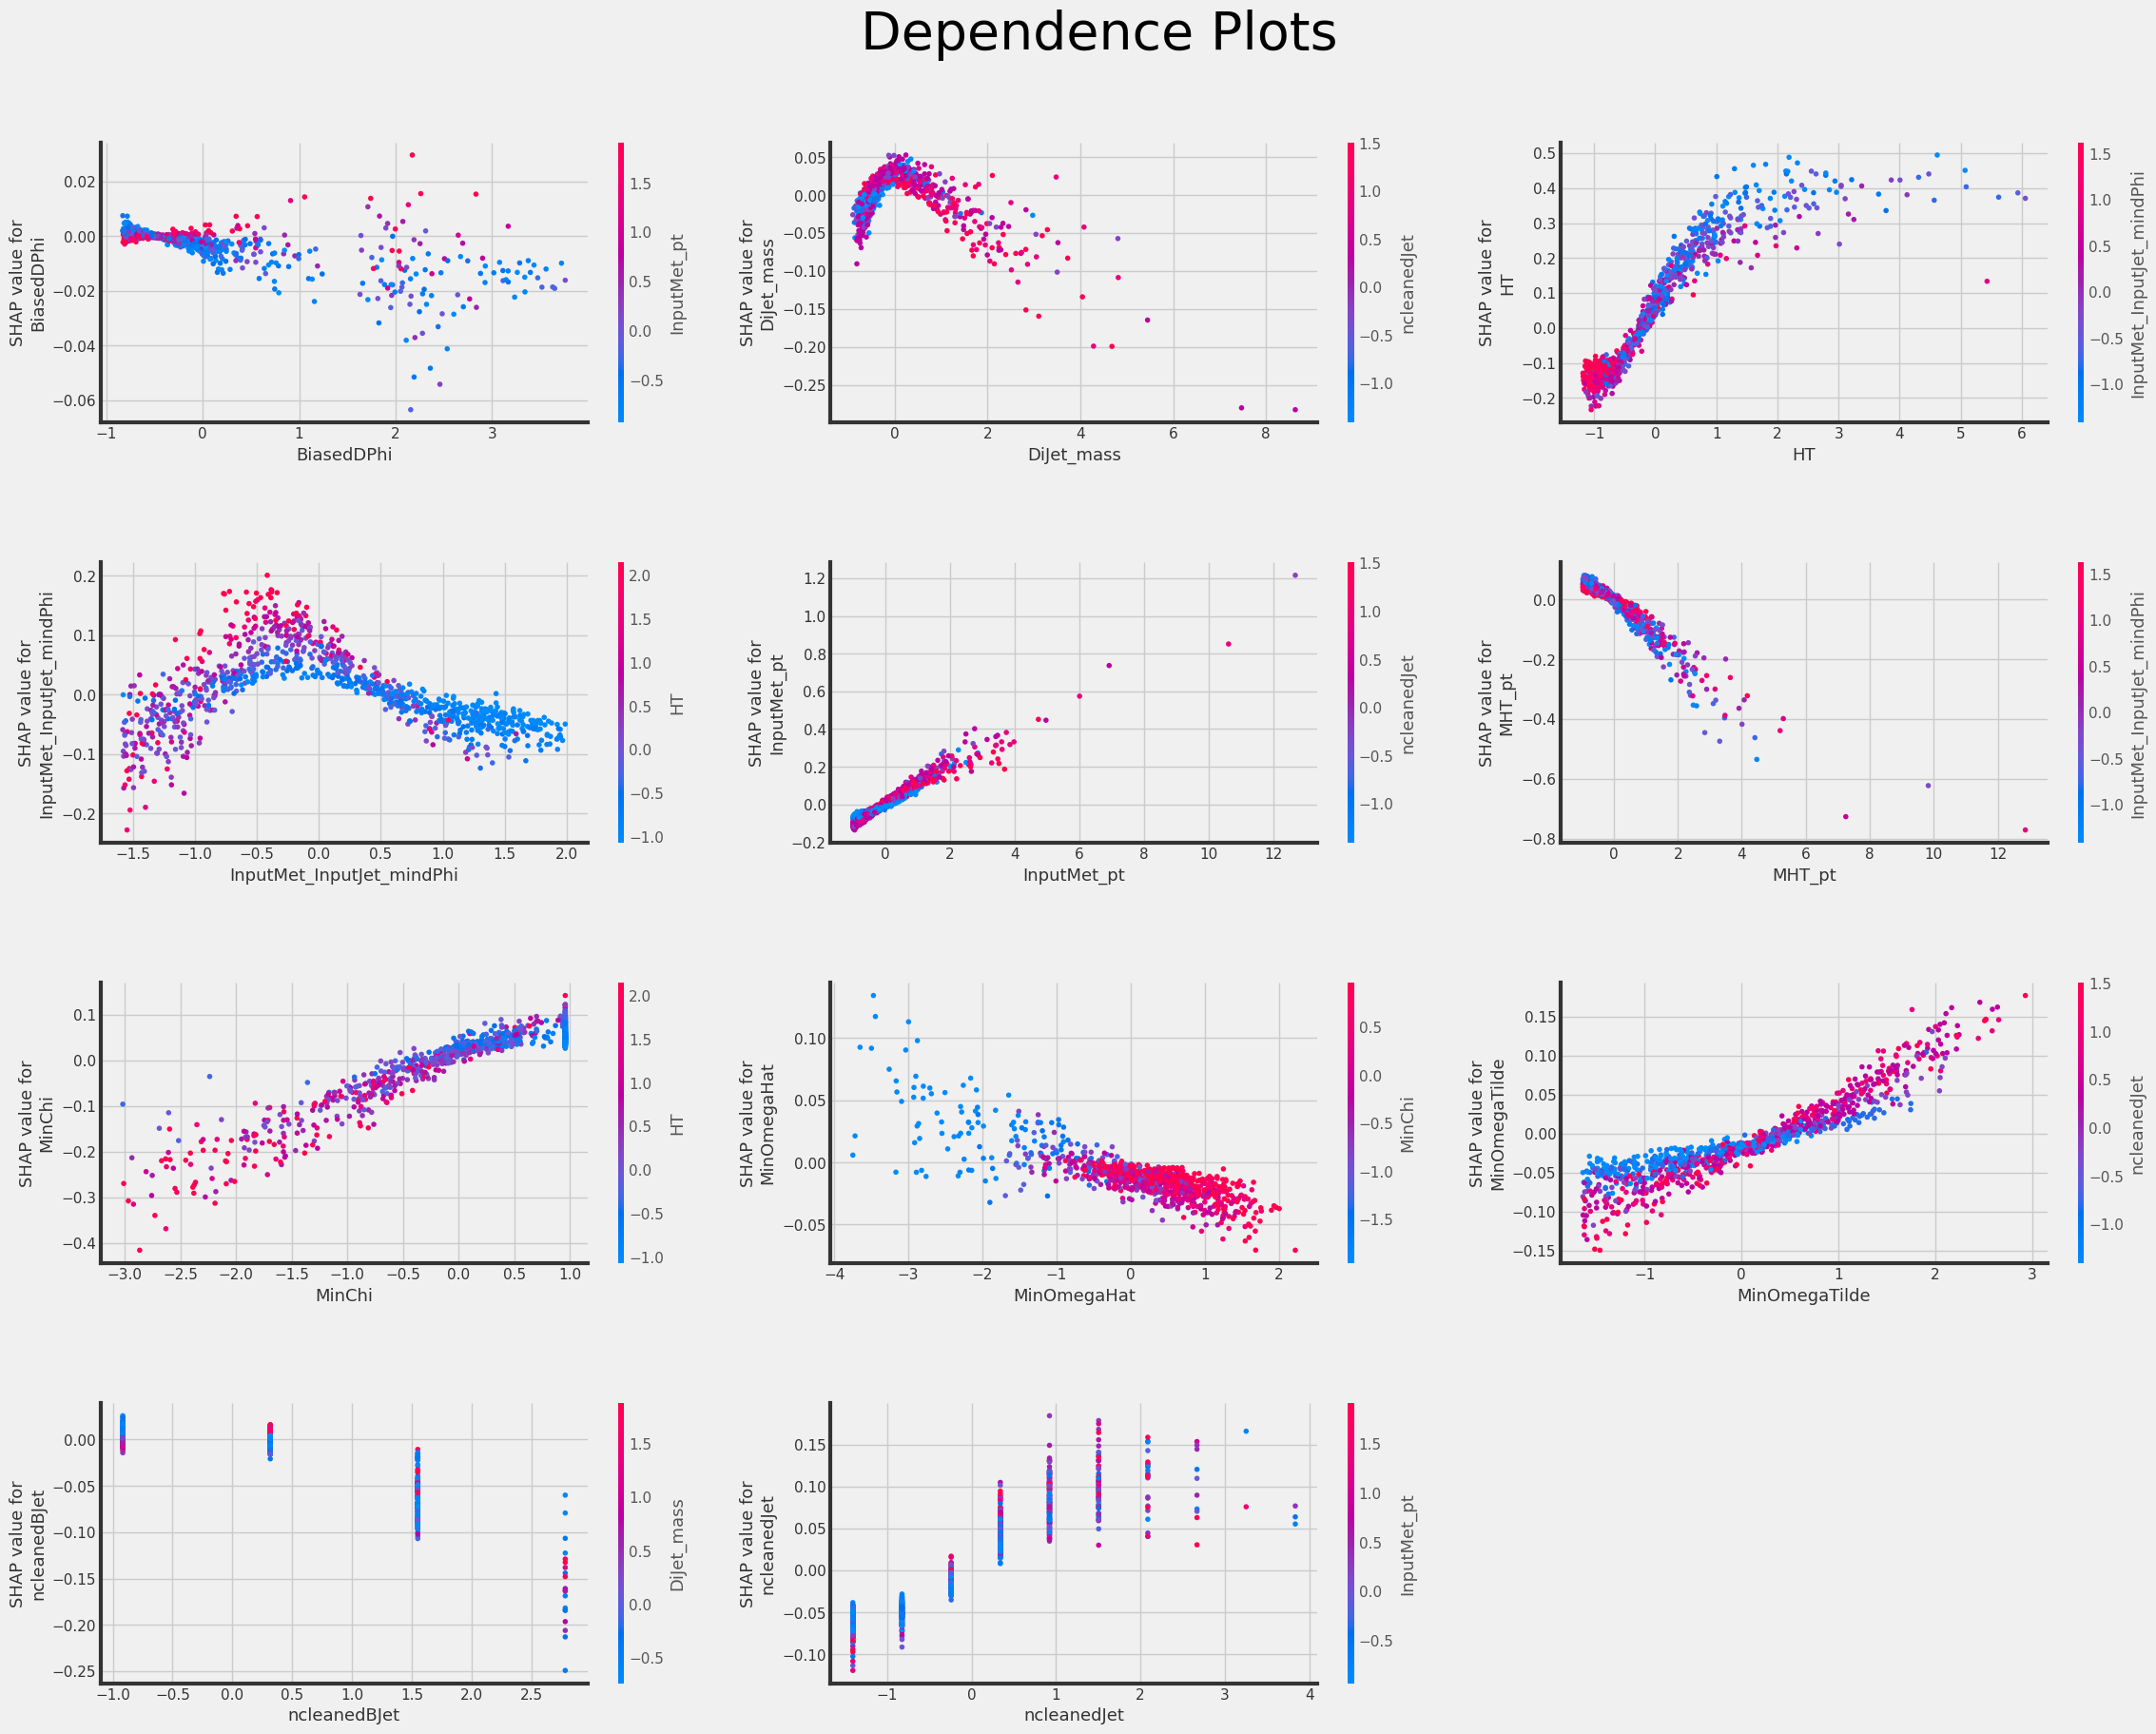

In [131]:
plt.figure(figsize=(25, 20))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Dependence Plots", fontsize=40, y=0.95)


for i, name in enumerate(event_X_train.columns):
    ax = plt.subplot(4, 3, i+1)
    shap.dependence_plot(name, shap_values[0][0], event_X_test.head(n_values), ax=ax, show=False)